In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from spacy.lang.en.stop_words import STOP_WORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

EDA - Count Vectorize for Overall Reviews Rated 0-2 Stars

In [2]:
#import dataset for reviews rated 0-2 stars
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/kchien_data/

df = pd.read_csv('0to2stars_for_vectorizing.csv')

Mounted at /content/drive
/content/drive/My Drive/kchien_data


In [3]:
#stopwords
custom_stop = ['airbnb', 'air bnb', 't', 's', 'air', 'bnb', 'new', 'york', 'new york']
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop).union(STOP_WORDS)

In [4]:
len(stop_words)

362

In [5]:
#implement stopwords and vectorize bigram

cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(2,2))

comments = cvec.fit_transform(df['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names())

commentsdf.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0 stars,05 minutes,07min walking,1 12,1 2,1 bathroom,1 day,1 days,1 dishes,1 drinking,1 eachbroverall,1 glass,1 mattress,1 min,1 month,1 night,1 pan,1 pot,1 roll,1 set,1 towel,1 week,1 weekbr,10 business,10 days,10 min,10 minutes,10 people,10 replace,10 rooms,100 care,100 clean,100 cleaning,100 decide,100 nightbrbrif,100 occupancy,100 pay,100 times,1000 pm,1000 requested,1000 week,100br darty,1015 min,1015 minutes,10pm book,10pm joke,10pmbr big,11 pm,11am pushed,11pm free,11pmbri definitely,12 block,12 friends,12 hrs,12 months,12 weeks,1200 month,1200 stay,1200 tub,125th avenue,12am start,1300 anticipating,137 cleaning,141 refund,15 bathroom,15 bathrooms,15 minutes,150 deposit,1500 month,166 month,16th st,18 hours,185000 account,197677 usd,19th luckily,1am weeknight,1f brboth,1k better,1st floor,2 1,2 10,2 3,2 additional,2 bathroom,2 bathrooms,2 bedroom,2 began,2 blocks,2 bowls,2 colleagues,2 cups,2 days,2 dry,2 females,2 forks,2 guys,2 half,2 hours,2 hrs,2 huge,2 knives,2 liter,2 min,2 mins,2 month,2 months,2 nights,2 park,2 peers,2 people,2 plates,2 purchase,2 rooms,2 sets,2 small,2 spoons,2 stayed,2 wash,2 weeks,20 days,20 minute,20 minutes,200 hotel,200 options,200 worth,20s looking,20th told,23 girls,23 hours,23 messages,23 morning,23 rooms,24 hour,24 hours,247 came,247 hot,24hour laundromat,25 hours,25 long,25 minutes,2500 camera,25us cleanliness,26250 fees,28 days,281 charged,2850 resolved,2850brbrdo stay,2am 4am,3 agreed,3 apt,3 building,3 day,3 days,3 door,3 hours,3 later,3 months,3 people,3 pm,3 rooms,3 times,30 beginning,30 day,30 days,30 minutes,30 old,300 500pm,300 nyc,3000 5,30000 possible,30days booked,30days wouldnt,315pm accommodate,35 different,350 pet,3hrs dry,3months recommend,3pm arrived,3pm informed,3rd bedroom,3rd day,3story walkup,4 8,4 bedroom,4 check,4 days,4 entire,4 flights,4 hours,4 nights,4 people,4 pm,4 times,4 tv,4 weeks,4 year,40 minutes,400 dollars,400pm told,430 failed,430 half,430pm tereza,45 different,45 minutes,479 bri,48 hours,4am 6am,4am fact,4k stay,4people book,4pm fair,4pm understanding,4th day,4th floor,5 10,5 4,5 8,5 business,5 cats,5 days,5 kitchen,5 literal,5 minutes,5 pieces,5 rooms,5 star,5 stars,5 times,5 weeks,50 bucks,50 extra,50 place,50 timebrbrour,500 deposit,500 dollars,500 words,500pm asked,513 going,530pm arranged,56 times,5k place,5stars service,5th ave,5th avenue,5th floor,6 7,6 bedrooms,6 month,6 picture,6 rooms,...,wish left,wish proactive,wish seen,wobbly informing,wobbly things,woke lungs,woke night,woke roach,woke times,woke upbralso,woman contacted,woman home,woman host,woman lives,woman living,woman night,woman smoked,woman spoke,woman traveling,woman walking,women dog,women hair,won happen,won refund,wonderful thats,wonderfully cozy,wonderfully located,wont able,wont chance,wont conflict,wont posted,wont respond,wont sleep,wont suggest,word pointing,words ll,work 6am,work apartment,work arrived,work barely,work bath,work bathroom,work brbrno,work brchange,work brpaint,work brthe,work demanding,work desk,work difficult,work end,work home,work host,work knocked,work line,work matters,work morning,work offered,work online,work recommend,work remain,work responsive,work right,work second,work solving,work space,work started,work suitable,work time,work trip,work unprofessional,work unresponsiveness,work waiting,work wasn,work weak,work won,work working,work wouldn,workbr owner,worked 50,worked addressed,worked cohost,worked fine,worked roommate,worked weeklong,worked wifi,working ac,working appliances,working claim,working deadbolt,working different,working fan,working fbi,working feds,working fix,working home,working hospital,working let,working management,working microwave,working overall,working owner,working properly,working research,working room,working rooms,working shower,working spaces,working toiletries,working towel,working tried,working tv,working wife,working wont,workingbr apartment,works cool,works heat,works music,works old,works regularly,works we

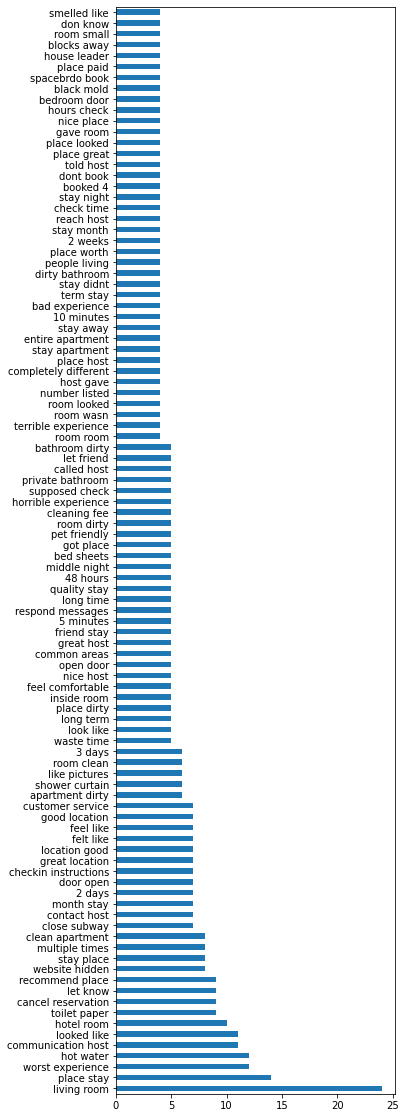

In [6]:
commentsdf.sum().sort_values(ascending = False).head(100).plot(kind = 'barh', figsize=(5,20));

In [7]:
#contextualize "living room"

livingroom = df[df['comments'].str.contains('living room')]
pd.options.display.max_colwidth = int(livingroom['comments'].str.len().max()) + 1
print(livingroom['comments'])

13                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

EDA - Count Vectorize for Reviews 3-3.99 Stars

In [8]:
#import dataset for reviews rated 3-3.99 stars
df = pd.read_csv('3stars_for_vectorizing.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


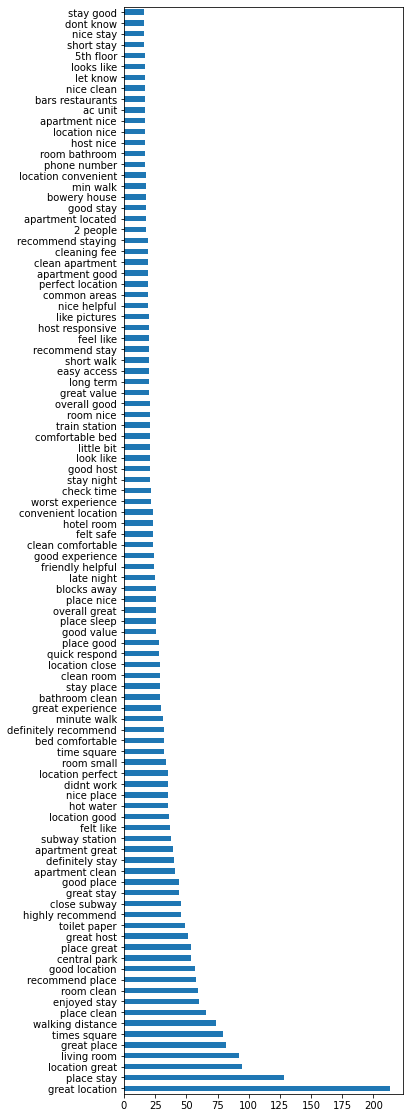

In [9]:
#implement stopwords and vectorize bigram

cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(2,2))

comments = cvec.fit_transform(df['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names())

commentsdf.sum().sort_values(ascending = False).head(100).plot(kind = 'barh', figsize=(5,20));

In [10]:
#import dataset for reviews rated 5 stars
df = pd.read_csv('5stars_for_vectorizing.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


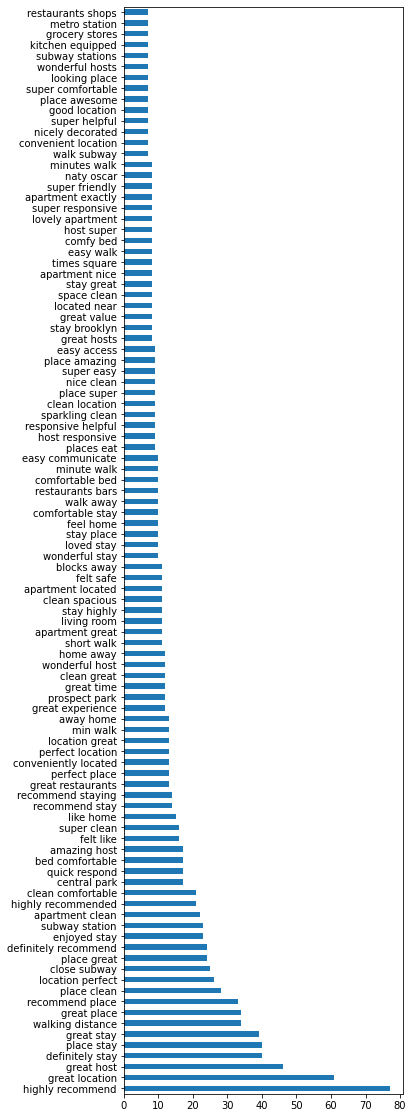

In [11]:
#implement stopwords and vectorize

cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(2,2))

comments = cvec.fit_transform(df['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names())

commentsdf.sum().sort_values(ascending = False).head(100).plot(kind = 'barh', figsize=(5,20));

## Observations
- location for higher ratings and cleanliness
- inaccurate posts and cleanliness for lower ratings